# ASSIGNMENT 2:
Classify the email using the binary classification method. Email Spam detection has two 
states: a) Normal State – Not Spam, b) Abnormal State – Spam. Use K-Nearest Neighbors and 
Support Vector Machine for classification. Analyze their performance.
Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, RocCurveDisplay
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import seaborn as sns


In [2]:
df=pd.read_csv('emails.csv')
print(df.head(5))
print(df.tail(5))

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0           0  
1       0    0               0         0         0   1    0           0  
2       0    0               0         0         0   0    0           0  
3       0    0               0         0         0   0    0           0  
4       0    0               0         0         0   1    0           0  

[5 rows x 3002 columns]
       Email No.  the  to  ect  and  for  of    a  you  hou  .

In [3]:
# Checking for null data. It seems that there is none.
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [4]:
# df.corr(method='pearson')

Visualizing ratio Ham/Spam:



<function matplotlib.pyplot.show(close=None, block=None)>

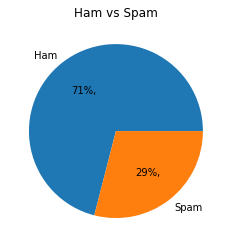

In [5]:
import matplotlib.pyplot as plt
print("Visualizing ratio Ham/Spam:\n")
count_Class = pd.value_counts(df['Prediction'], sort=True)
# print(count_Class)
count_Class.plot(kind = 'pie',labels=['Ham','Spam'], autopct='%1.0f%%,')
plt.title('Ham vs Spam')
plt.ylabel('')
plt.show

In [6]:
# Splitting dataframe into features and target.
X = df.iloc[:,1:-1]
Y = df.iloc[:,-1].values
print(X.shape)
print(Y.shape)

(5172, 3000)
(5172,)


In [7]:
# Splitting data into test and train
train_x, test_x, train_y, test_y = train_test_split (X,Y, test_size=0.33, random_state=42)

from sklearn.metrics import plot_confusion_matrix,classification_report,plot_precision_recall_curve,plot_roc_curve
def report(model):
    preds = model.predict(test_x)
    print(model.__class__.__name__)
    print("Score:",model.score(test_x,test_y))
    print(classification_report(preds,test_y))
    plot_confusion_matrix(model,test_x,test_y)
    plot_precision_recall_curve(model,test_x,test_y)
    plot_roc_curve(model,test_x,test_y)


## Naive Bayes

              precision    recall  f1-score   support

         Ham       0.94      0.98      0.96      1168
        Spam       0.96      0.87      0.91       539

    accuracy                           0.95      1707
   macro avg       0.95      0.93      0.94      1707
weighted avg       0.95      0.95      0.95      1707

Accuracy score for Naive Bayes:  0.9466900995899239


<AxesSubplot:>

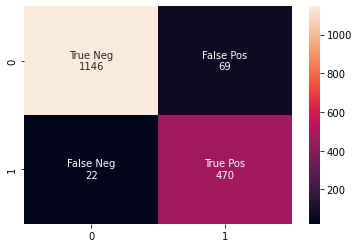

In [8]:
# Naive Bayes, a weak algorithm.

mnb =  MultinomialNB ( alpha = 1.9 )
mnb.fit(train_x, train_y)
y_predNB = mnb.predict(test_x)
target_labels = ['Ham','Spam']
print(classification_report(y_predNB, test_y, target_names=target_labels))
print("Accuracy score for Naive Bayes: ", accuracy_score(y_predNB, test_y))
cm = confusion_matrix(test_y, y_predNB)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2, in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')



## K-Nearest Neighbors

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
KNclassifier.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier
Score: 0.8711189220855302
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1275
           1       0.72      0.81      0.76       432

    accuracy                           0.87      1707
   macro avg       0.82      0.85      0.84      1707
weighted avg       0.88      0.87      0.87      1707



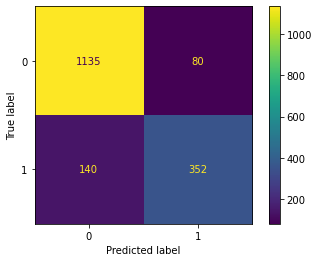

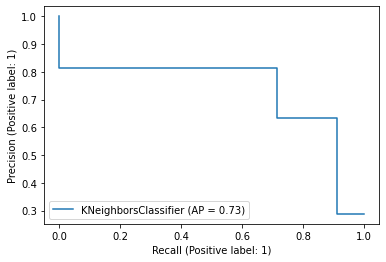

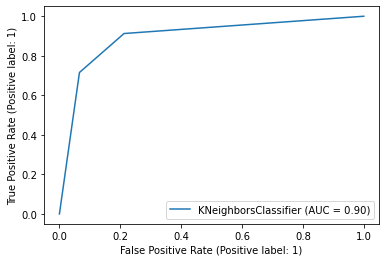

In [10]:
report(KNclassifier)

## Support vector machines (SVMs)

In [11]:
from sklearn.svm import SVC

SVC_classifier=SVC(kernel='poly',gamma='auto',degree=3)

SVC_classifier.fit(train_x,train_y)

SVC(gamma='auto', kernel='poly')

In [12]:
SVC_classifier.score(test_x,test_y)

0.8763913298183948

SVC
Score: 0.8763913298183948
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1330
           1       0.67      0.87      0.76       377

    accuracy                           0.88      1707
   macro avg       0.81      0.88      0.84      1707
weighted avg       0.90      0.88      0.88      1707



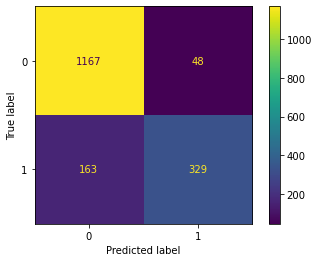

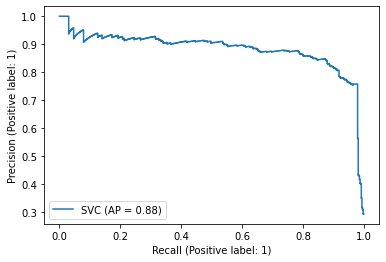

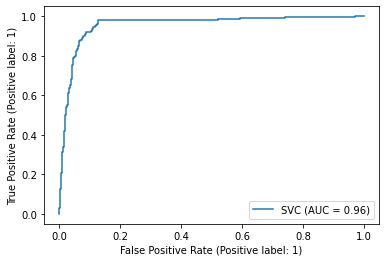

In [13]:
report(SVC_classifier)